In [ ]:
#importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import svm

In [ ]:
#importing the dataset into the notebook.
file_path = '/content/AssignmentData _ ElectricPe.xlsx'
df = pd.read_excel(file_path)

In [ ]:
#dropping all rows with NULL values
df.dropna(inplace=True)

In [ ]:
#overview of dataset.
df.describe()

,hour17,hour18,hour19,hour20,hour21,hour22,hour23
count,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000,18775.000000
mean,0.814221,0.816192,0.815659,0.816138,0.815712,0.814913,0.811771
std,0.388939,0.387338,0.387772,0.387382,0.387729,0.388378,0.390905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#feature vector for model training
features=df[['Station_Name','Station_Category','Station_Access']]

In [ ]:
#label encoding for feature vector.
label_encoder=preprocessing.LabelEncoder()
features['Station_Category']=label_encoder.fit_transform(features['Station_Category'])

features['Station_Access']=label_encoder.fit_transform(features['Station_Access'])

features['Station_Name']=label_encoder.fit_transform(features['Station_Name'])

<ipython-input-6-97624cfc5d5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Station_Category']=label_encoder.fit_transform(features['Station_Category'])
<ipython-input-6-97624cfc5d5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Station_Access']=label_encoder.fit_transform(features['Station_Access'])
<ipython-input-6-97624cfc5d5b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
#iterativly running SVM model for columns from hour0 to hour23 independently.
for i in range(7,31):
    # Add the target column
    target = df.iloc[:,i]
    #target values replaced with numerical values.
    target = target.replace({True: 1, False: 0})

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)  #test-train split in 80:20 ratio.

    # Create the SVM classifier
    clf = svm.SVC(kernel='rbf', C=1, random_state=0)  #gaussian kernel

  # Train the model
    clf.fit(x_train, y_train)

    #model testing and computation of accuracy.
    y_predicted= clf.predict(x_test)
    print(f'Validation Accuracy of {df.columns[i]}: {accuracy_score(y_test, y_predicted)*100:.2f} %')

Validation Accuracy of hour0: 80.00 %
Validation Accuracy of hour1: 80.21 %
Validation Accuracy of hour2: 80.03 %
Validation Accuracy of hour3: 79.95 %
Validation Accuracy of hour4: 79.92 %
Validation Accuracy of hour5: 80.00 %
Validation Accuracy of hour6: 79.97 %
Validation Accuracy of hour7: 78.67 %
Validation Accuracy of hour8: 78.59 %
Validation Accuracy of hour9: 78.56 %
Validation Accuracy of hour10: 78.46 %
Validation Accuracy of hour11: 78.54 %
Validation Accuracy of hour12: 78.75 %
Validation Accuracy of hour13: 78.54 %
Validation Accuracy of hour14: 78.43 %
Validation Accuracy of hour15: 78.24 %
Validation Accuracy of hour16: 78.56 %
Validation Accuracy of hour17: 80.16 %
Validation Accuracy of hour18: 80.37 %
Validation Accuracy of hour19: 80.51 %
Validation Accuracy of hour20: 80.45 %
Validation Accuracy of hour21: 80.27 %
Validation Accuracy of hour22: 80.43 %
Validation Accuracy of hour23: 80.19 %


In [ ]:
for i in range(7,31):
    # Add the target column
    target = df.iloc[:,i]

    target = target.replace({True: 1, False: 0})

    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

    # Create the Random Forest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(x_train, y_train)

    # Predict the class for a new sample
    y_predicted= clf.predict(x_test)
    print(f'Validation Accuracy of {df.columns[i]}: {accuracy_score(y_test, y_predicted)*100:.2f} %')

Validation Accuracy of hour0: 92.01 %
Validation Accuracy of hour1: 92.04 %
Validation Accuracy of hour2: 91.90 %
Validation Accuracy of hour3: 92.04 %
Validation Accuracy of hour4: 92.06 %
Validation Accuracy of hour5: 91.85 %
Validation Accuracy of hour6: 91.82 %
Validation Accuracy of hour7: 91.29 %
Validation Accuracy of hour8: 91.19 %
Validation Accuracy of hour9: 90.97 %
Validation Accuracy of hour10: 91.00 %
Validation Accuracy of hour11: 91.16 %
Validation Accuracy of hour12: 91.26 %
Validation Accuracy of hour13: 90.89 %
Validation Accuracy of hour14: 90.89 %
Validation Accuracy of hour15: 90.76 %
Validation Accuracy of hour16: 90.95 %
Validation Accuracy of hour17: 91.58 %
Validation Accuracy of hour18: 91.56 %
Validation Accuracy of hour19: 91.64 %
Validation Accuracy of hour20: 91.80 %
Validation Accuracy of hour21: 91.88 %
Validation Accuracy of hour22: 91.72 %
Validation Accuracy of hour23: 91.77 %


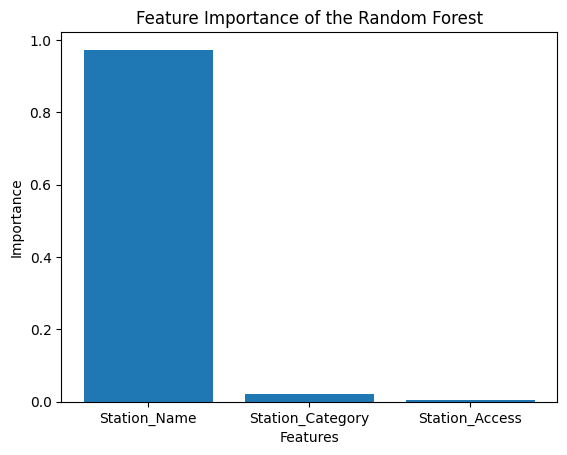

In [ ]:
# Plot the feature importances
importances = clf.feature_importances_

plt.bar(features.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of the Random Forest')
plt.show()

In [ ]:
#classification report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77       744
         1.0       0.93      0.97      0.95      3011

    accuracy                           0.92      3755
   macro avg       0.90      0.83      0.86      3755
weighted avg       0.92      0.92      0.91      3755



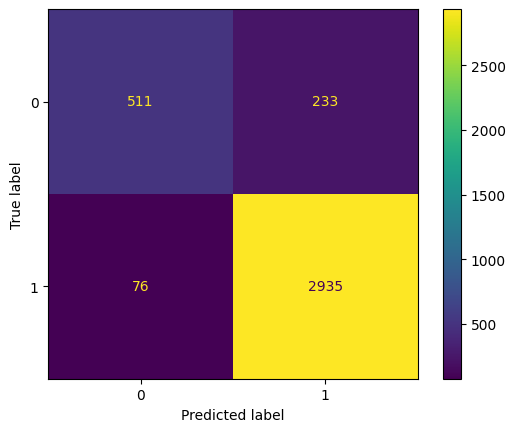

In [ ]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Accuracy was obtained in the range 90% - 92% for different hours of the day using Random Forest Algorithm.